In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


Epoch 1/3
60000/60000 [==============================] - 4s 74us/step - loss: 0.3100 - acc: 0.9134
Epoch 2/3
60000/60000 [==============================] - 4s 70us/step - loss: 0.1398 - acc: 0.9596
Epoch 3/3
60000/60000 [==============================] - 4s 70us/step - loss: 0.0968 - acc: 0.9708


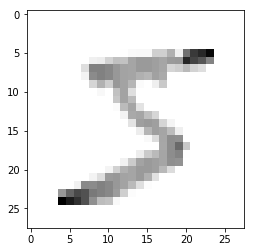

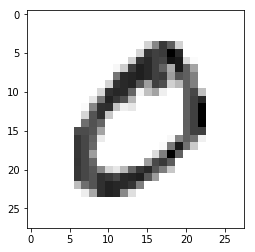

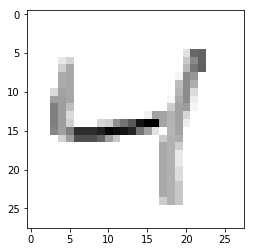

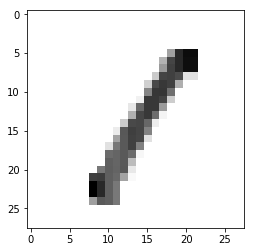

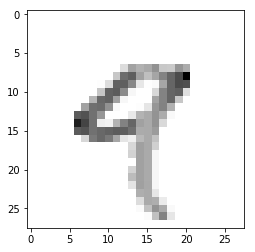

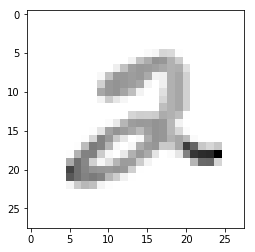

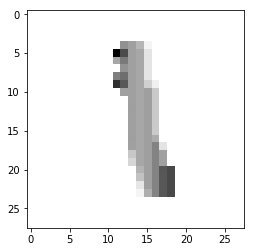

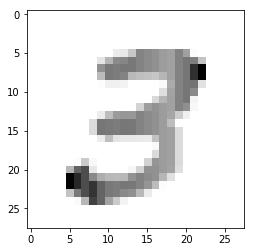

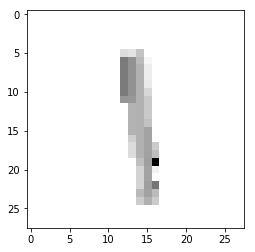

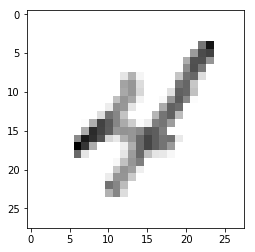

In [5]:
mnist = keras.datasets.mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data=keras.utils.normalize(train_data,axis=1)
test_data=keras.utils.normalize(test_data,axis=1)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=3)
for i in range(20):
    plt.imshow(train_data[i],cmap=plt.cm.binary)
    plt.show()


In [4]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/step
Test accuracy: 0.9681


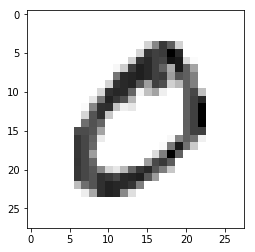

In [5]:
%matplotlib inline
plt.imshow(train_data[1],cmap=plt.cm.binary)
plt.show()
# print(train_data[1])

In [6]:
model.save('epic_num_reader.model')

In [7]:
new_model=keras.models.load_model('epic_num_reader.model')

In [8]:
pridiction=new_model.predict([test_data])

In [9]:
print(pridiction)

[[2.8140533e-07 4.3653507e-09 3.8754766e-05 ... 9.9801993e-01
  2.0553058e-07 6.8108739e-06]
 [9.6176755e-06 3.2059944e-03 9.9527103e-01 ... 2.3695040e-10
  1.2584012e-05 1.9724899e-10]
 [1.5749409e-06 9.9607772e-01 2.0458622e-04 ... 3.7308320e-04
  2.3099193e-03 8.4934109e-06]
 ...
 [2.6391408e-08 1.7766467e-07 6.9041846e-07 ... 2.6374164e-05
  6.3489977e-05 5.0001806e-03]
 [1.4249393e-04 1.8651284e-05 3.5332052e-06 ... 2.2452177e-05
  1.5518937e-02 1.3394723e-06]
 [6.2966370e-05 9.1497157e-08 1.8083489e-05 ... 6.1502821e-09
  4.5190291e-07 1.1205565e-08]]


In [10]:
np.argmax(pridiction[0])

7

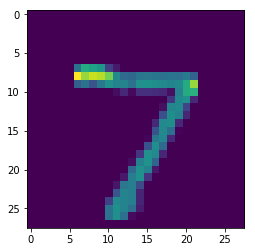

In [11]:
plt.imshow(test_data[0])
plt.show()